<a href="https://colab.research.google.com/github/rbeydoun30/COVID-19-Project/blob/main/Bike_Sharing_Company_Analysis_(Robbie_Beydoun).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Bike-Sharing Company Analysis**
In this analysis, I will be diving into bike-sharing data that will help a bike-sharing company maximize their business with the insights garnered throughout this project.

**Libraries:**
It is important to upload all the proper libraries to be able to visualize and analyze the data.

In [ ]:
#Import the appropriate Python libraries
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Loading Data:**
Here, I take the bike data and assign it to the name "bike" so the data is easier to call to.

In [ ]:
#Load the following CSV file
bike = pd.read_csv("http://bit.ly/bike-data")

In [ ]:
#Calculate the dimensions (rows and columns) in the dataset
bike.shape

(731, 14)

**Data Types:**
Laying out all the columns in the dataset, along with what can be inserting in those data types, to understand more about each column in the data.

In [ ]:
#List the columns in the dataset along with their data types.
bike.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

In [ ]:
#Preview the first 5 records of the dataset.
bike.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


**Creating New Column for Total Bike Rentals:**
Here, I added together the casual rentals and the registered rentals together, so that we can understand how many total rentals there are.


In [ ]:
#Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns.
bike.insert(14,"total_rentals",bike["casual_rentals"]+bike["registered_rentals"])
bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Summary of Data:**
This is a summary of rental data based upon the different columns. This can help us get an understanding of where there is the highest and lowest rentals based on different variables.

In [ ]:
#Generate descriptive stats for the numeric columns in the dataset
bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight on Time of Rentals:**
Here, we can see the performance of each year, season, and month, for the total bike rentals. It is important to see the sum and the average for each of these time frames.

In [ ]:
#Create a pivot table that has "yr" and "mnth" as indices (in that order) and that sums and averages "total_rentals"
pd.pivot_table(bike,values="total_rentals",index=["yr","season","mnth"],aggfunc={"total_rentals":[np.sum,np.mean]})

mean       sum
yr season mnth                       
0  1      1     1231.903226   38189.0
          2     1721.964286   48215.0
          3     2060.300000   41206.0
          12    2035.454545   22390.0
   2      3     2076.272727   22839.0
          4     3162.333333   94870.0
          5     4381.322581  135821.0
          6     4689.300000   93786.0
   3      6     4972.600000   49726.0
          7     4559.387097  141341.0
          8     4409.387097  136691.0
          9     4176.909091   91892.0
   4      9     4440.750000   35526.0
          10    3984.225806  123511.0
          11    3405.566667  102167.0
          12    3246.650000   64933.0
1  1      1     3120.774194   96744.0
          2     3556.448276  103137.0
          3     5042.950000  100859.0
          12    1873.454545   20608.0
   2      3     5819.636364   64016.0
          4     5807.466667  174224.0
          5     6318.225806  195865.0
          6     6858.400000  137168.0
   3      6     6566.200000   65662.0
          7     6567.967742  203607.0
          8     6919.451613  214503.0
          9     7168.500000  157707.0
   4      9     7608.250000   60866.0
          10    6414.225806  198841.0
          11    5088.800000  152664.0
          12    5155.250000  103105.0

**Data Cleaning:**
It is important to clean the data and check for things like missing values, so that we can gain accurate insight when making calculations. Luckily, there is not any missing data in our dataset.

In [ ]:
#Determine whether or not there are any missing values in the dataset.
bike.isnull().any()

ID                    False
date                  False
yr                    False
mnth                  False
weekday               False
season                False
holiday               False
working_day           False
temp                  False
atemp                 False
hum                   False
windspeed             False
casual_rentals        False
registered_rentals    False
total_rentals         False
dtype: bool

**Histogram of Total Rentals:**
Here, is a bell shape histogram showing the distribution of the total bike rentals.

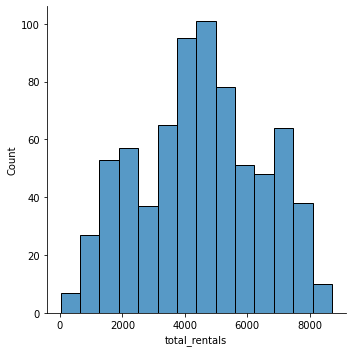

In [ ]:
#Generate a histogram to visualize the distribution of data in the "total_rentals" column.
seaborn.displot(bike,x="total_rentals")

**Scatterplot of Rentals:** This scatterplot shows the Casual Rentals and Registered Rentals based on if the rental was during a work day or not. 

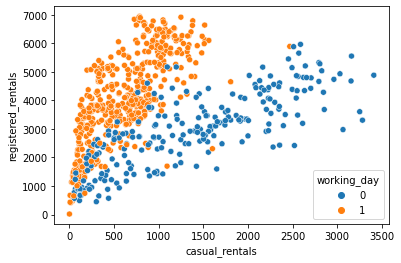

In [ ]:
#Generate a scatterplot to show the relationship between "casual_rentals" and "registered_rentals" on a daily basis.
seaborn.scatterplot(data=bike,x="casual_rentals",y="registered_rentals",hue="working_day")

**Swarmplot of Seasonal Data:**
In this swarmplot, you can see the total rentals for each season. It is clear that season 1 has the lowest amount of rentals, and season 3 seems to have the highest amount of rentals.

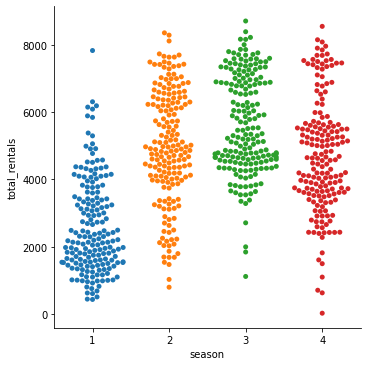

In [ ]:
#Generate a swarmplot to explore the total rentals by season. The "season" should be on the x-asis and "total_rentals" on the y-axis
seaborn.catplot(x="season",y="total_rentals",data=bike,kind="swarm")

**Line Plot of Average Daily Rentals:**
This line plot shows the average daily rentals by month. The bottom line shows year 1, and the top line shows year 2. You can see that there are spikes in rentals in both years, from month 2 to about month 7 in both years. Then, months 10 through 12, there are rapid declines in both years.

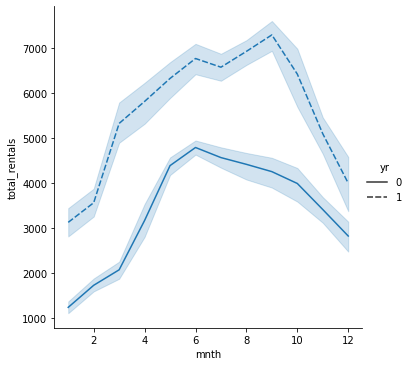

In [ ]:
#Generate a line plot that shows average daily rentals by month and split the lines by year. The "mnth" should on the x-axis, the "total_rentals" on the yaxis, and their should be a line for each value in the "yr" column.
seaborn.relplot(data=bike,x="mnth",y="total_rentals",style="yr",kind="line")

**Pair Plot with Weather:**
This is a pair plot showing how the weather plays a factor on the total rentals. You can see that the higher the weather, the more rentals there usually are. Then you can see, the higher the windspeed, the lower the rentals are.

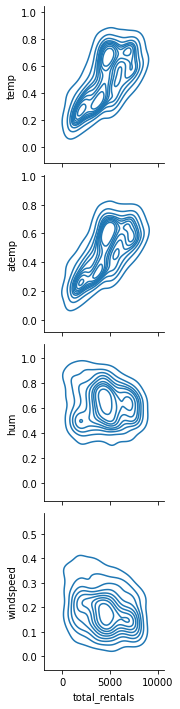

In [ ]:
#Generate a pairplot to show the relationship between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), which are continuous variables.
seaborn.pairplot(data=bike,x_vars="total_rentals",y_vars=["temp", "atemp", "hum","windspeed"],kind="kde")

**Heat Map of Weather Indicator:**
Here, we can see a heat map showing how weather has an effect on the total rentals. This shows the variables of weather that are in the most interest for bike rentals. This shows that when temp and atemp are high, it correlates with higher rentals.

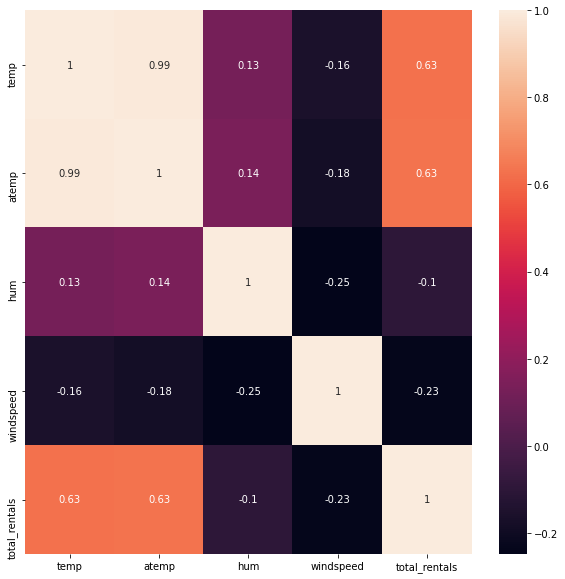

In [ ]:
#Use a heatmap to visualize the correlation between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), which are continuous variables.
pyplot.figure(figsize=(10,10))
seaborn.heatmap(data=bike[["temp", "atemp", "hum", "windspeed", "total_rentals"]].corr(),annot=True)


**Setting Up and Testing Data for Prediction:** in the rest of the cells, I am traning and testing the data to make a prediction based on a temp of .30. This will show us how we can predict bike rentals when the temperature gets to a certain point.

In [ ]:
#In preparation for linear regression (where you will be predicting "total_rentals"), separate the dependent variable (y) and independent variables (X), and
#only include those independent variables shown in the heatmap that have a correlation coefficient (r) with respect to "total_rentals" that is greater than
#0.5 or less than -0.5
y=bike["total_rentals"]
X=bike[["temp"]]
X.head()

,temp
0,0.344167
1,0.363478
2,0.196364
3,0.200000
4,0.226957


In [ ]:
#Split the data into training and test sets. Put 25% of the data into the test set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Train ("fit") the linear regression model using the training data.
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Identify the intercepts and coefficients of the regression model.
print("intercept:",model.intercept_,"coefficient:",model.coef_)

intercept: 1327.930810368468 coefficient: [6463.96764523]


**Prediction:**
This shows that we can predict 3267 total bike rentals when the temperature gets to .30 in our model. This is valuable knowledge, so our bike business can leverage the weather and forecasting based on the weather report.

In [ ]:
#Use the regression model to predict “total_rentals” when "temp" = 0.30.
model.predict([[0.3]])

array([3267.12110394])

In [ ]:
#Use the regression model to predict total bike rentals in the test data. Store your predictions in a variable called "y_pred". 
y_pred = model.predict(X_test)

In [ ]:
#Generate the R squared.
metrics.r2_score(y_test,y_pred)

0.37540464616240454